In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [72]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import tensorflow_probability as tfp
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

from vae.data import prep_images
from vae.model import Model

In [3]:
sns.set_style('white')
sns.set_context('notebook')

In [4]:
tf.enable_eager_execution()

In [5]:
(images_train, labels_train), (images_test, labels_test) = tf.keras.datasets.mnist.load_data()
images_train = prep_images(images_train)
images_test = prep_images(images_test)
image_size = 28

In [6]:
model = Model(
    inputs_loc=0.0,
    inputs_scale=1.0,
    inputs_shape=[28, 28, 1])

In [7]:
latent_prior = tfp.distributions.MultivariateNormalDiag(
    loc=tf.zeros(shape=[8], dtype=tf.float32),
    scale_identity_multiplier=1.0)

In [8]:
job_dir = '/Users/fomoro/jobs/vae/1541877107/'
checkpoint = tf.train.Checkpoint(model=model)
checkpoint_path = tf.train.latest_checkpoint(job_dir)
checkpoint.restore(checkpoint_path);

In [10]:
z_dist = model.encode(images_test, labels_test)
z = z_dist.mean()
z_numpy = z.numpy()

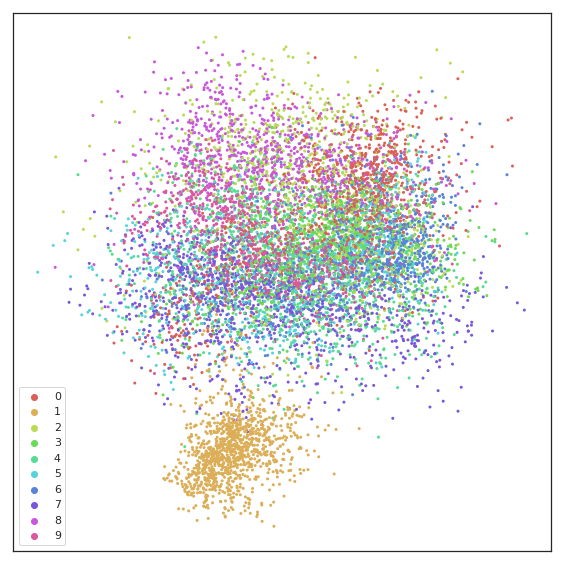

In [11]:
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=z_numpy[:, 0],
    y=z_numpy[:, 1],
    hue=labels_test,
    palette=sns.color_palette('hls', 10),
    marker='.',
    linewidth=0)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

In [61]:
def plot_images(z_start, z_end, cond, steps):
    images = np.zeros(shape=(image_size, image_size * steps), dtype=np.float32)
    for i in range(steps):
        zi = z_start + (z_end - z_start) * (i / steps)
        dist = model.decode(zi, cond)
        image_mean = dist.mean()
        image = image_mean[0, ..., 0].numpy()
        images[:, i*image_size:i*image_size+image_size] = image
    plt.figure(figsize=(8, 2))
    plt.imshow(images, cmap='gray')
    plt.title('{}'.format(cond[0]))
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

In [70]:
z_start = np.random.uniform(low=-1, high=1, size=[1, 2])
z_end = np.random.uniform(low=-1, high=1, size=[1, 2])
cond = np.random.randint(10, size=[1])

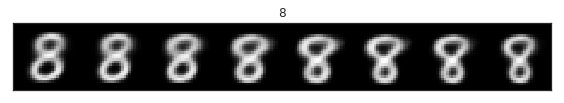

In [71]:
plot_images(z_start, z_end, cond, 8)